- 분할 정복은 다중 분기 재귀를 기반으로 하는 알고리즘 디자인 패러다임을 말한다.

In [1]:
## '분할 정복'(Divide and Conquer)은 직접 해결할 수 있을 정도로 간단한 문제가 될 때까지 
## 문제를 재귀적으로 쪼개나간 다음, 그 하위 문제의 결과들을 조합하여 원래 문제의 결고로 만들어 낸다.
## 대표적인 분할 정복 알고리즘으로는 병합 정렬을 들 수 있다.

## 폰 노이만이 병합 정렬을 통해 분할 정복을 설명한 것은 1945년이었는데, 
## 사실 문제를 축소해서 정복한다는 개념의 역사는 훨씬 더 이전인 기원 전까지 거슬러 올라간다.
## 고대 그리스의 수학자 유클리드는 자신이 저술한 『원론』에서 문제를 분할해 풀이하는 최대 공약수 알고리즘을 정리했으며,
## 이 유클리드 알고리즘은 인류 최초의 알고리즘으로 일컬어진다.

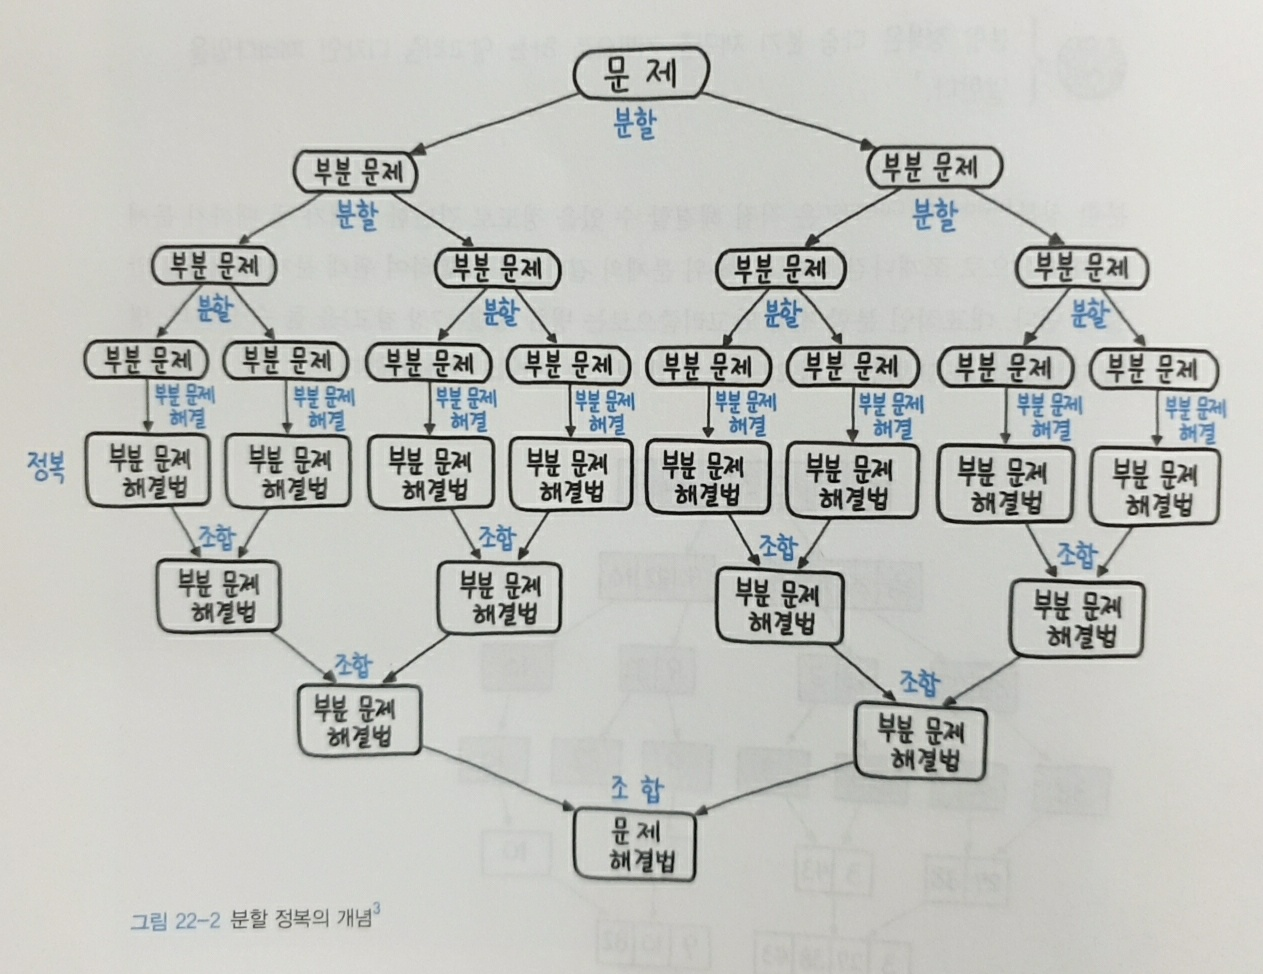

In [2]:
from IPython.display import Image

Image('그림22-2.jpg', width="500")

In [3]:
## 병합 정렬은 상단에서 '분할'하고 중앙에서 '정복'하고 하단에서 '조합'하는 분할 정복의 도식화를 잘 보여준다.
## 이를 좀 더 구체적으로 살펴보면 그림 22-2와 같이 정리할 수 있다.

- 분할: 문제를 동일한 유형의 여러 하위 문제로 나눈다.
- 정복: 가장 작은 단위의 하위 문제를 해결하여 정복한다.
- 조합: 하위 문제에 대한 결과를 원래 문제에 대한 결과로 조합한다.

In [4]:
## 분할 정복은 말 그대로 문제를 분할해서 정복한 다음 정답을 조합해 나간다는 의미를 지닌다.

## 아울러 이 장의 첫머리에서 소개한 위키피디아에 있는 정의에서도 '재귀'가 언급되어 있는 것처럼
## 분할 정복은 재귀를 활용하는 대표적인 알고리즘이기도 하다.
## 이를 수도코드로 표현해보면 다음과 같은 형태가 된다.

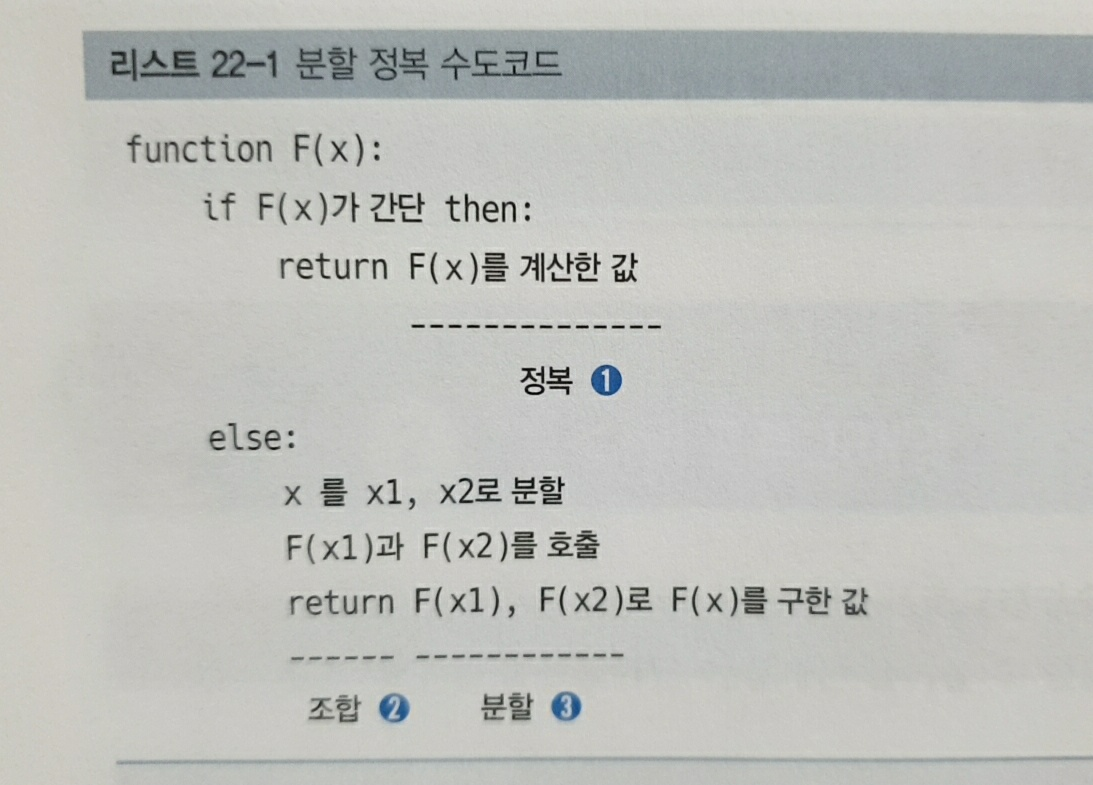

In [5]:
from IPython.display import Image

Image('리스트22-1.jpg', width="400")

In [6]:
## 이 같은 알고리즘 디자인 패러다임은  중급 이상의 코딩 테스트 문제로 빈번히 출제되며
## 23장에서 다시 한번 살펴보게 될 '최적 부분 구조'(Optimal Substructure)를 풀이하는 
## 매우 중요한 기법 중 하나이므로 잘 숙지해둘 필요가 있다.

# 83. 과반수 엘리먼트

### LeetCode 169. Majority Element

##### 과반수를 차지하는(절반을 초과하는) 엘리먼트를 출력하라

In [7]:
## 예제 1
    ## input: [3, 2, 3]
    ## output: 3
    
## 예제 2
    ## input: [2, 2, 1, 1, 1, 2, 2]
    ## output: 2

##### 풀이 1 브루트 포스로 과반수 비교

In [8]:
## 가장 쉬운 브루트 포스 비교 풀이부터 살펴보자.
## 앞에서부터 하나씩 과반수를 넘는지 일일이 체크하다가 과반수를 넘으면 바로 정답으로 처리하면 된다.

In [9]:
from typing import *

def majorityElement(nums: List[int]) -> int:
    for num in nums:
        if nums.count(num) > len(nums) // 2:
            return num

In [10]:
## 그러나 이렇게는 아쉽게도 타임아웃이 발생한다.

In [11]:
nums = [2, 2, 1, 1, 1, 2, 2]

majorityElement(nums)

2

In [12]:
## **** 문법 ****

    ## // 연산자
    
        ## // 연산자는 이전에도(3장 참조) 이미 여러 차례 살펴본 바 있다.
        ## 결과가 실수일 때 내림 처리를 하고 동일한 자료형을 리턴해주는 파이썬 특유의 편리한 연산자다.

##### 풀이 2 다이나믹 프로그래밍

In [13]:
## 다이나믹 프로그래밍으로 최적화해보자.
## 동일한 알고리즘으로 연산 횟수만 줄이면 어떻게든 풀어볼 수 있을 것 같다.

In [14]:
import collections

def majorityElement(nums: List[int]) -> int:
    counts = collections.defaultdict(int)
    for num in nums:
        if counts[num] == 0:
            counts[num] = nums.count(num)
            
        if counts[num] > len(nums) // 2:
            return num

In [15]:
## 매우 간단한 형태로 최적화했다. nums.count()로 한 번 카운트를 계산한 값은 저장해서 재활용했다.
## 만약 계산되지 않았던 값이 들어온다면 항상 0이 될 것이고, 그때만 카운트를 계산하게 될 것이다.
## 이 풀이는 '메모이제이션'(Memoization)을 이용한 매우 간단한 다이나믹 프로그래밍 풀이인데,
## 23장에서 좀 더 자세한 방법들을 살펴보게 될 것이다.

##### 풀이 3 분할 정복

In [16]:
## 병합 정렬은 분할 정복의 진수를 보여주는 알고리즘인데,
## 잘 살펴보면 이 문제는 병합 정렬과 매우 유사한 방식으로 풀이할 수 있다.
## 쪼갠 다음 정렬해서 각각의 엘리먼트를 전부 리턴하는 병합 정렬과 달리
## 여기서는 과반수 후보군에 해당하는 엘리먼트만 리턴하면서 계속 위로 올려주면(백트래킹) 최종적으로 정답이 남게 된다.

```python
def majorityElement(self, nums: List[int]) -> int:
    ...
    a = self.majorityElement(nums[:len(nums) // 2])
    b = self.majorityElement(nums[len(nums) // 2:])
```

In [17]:
## 이렇게 먼저 분할을 시도한다. a와 b는 각각 최소 단위로 쪼개질 것이다.
## 물론 그렇게 하기 위해서는 상단에 끊어서 리턴해주는 부분이 필요하다.

```python
def majorityElement(self, nums: List[int]) -> int:
    if not nums:
        return None
    if len(nums) == 1:
        return nums[0]
    
    a = self.majorityElement(nums[:len(nums) // 2])
    b = self.majorityElement(nums[len(nums) // 2:])
```

In [18]:
## 이제 이렇게 리턴해주면 최소 단위로 쪼개질 때 해당하는 값을 리턴하게 될 것이다.
## 마지막으로 백트래킹될 때 처리하는 부분을 다음과 같이 구현해보자

```python
return [b, a][nums.count(a) > len(nums) // 2]
```

In [19]:
## a가 만약 현재 분할된 리스트 nums에서 과반수를 차지한다면 해당 인덱스는 1(True)이 될 것이고,
## [b, a][1]이 되어 a를 리턴할 것이다. 즉 과반수인 엘리먼트를 리턴한다. 이외에는 b를 리턴한다.

## 여기서 좀 더 최적화를 해볼 수 있을 것 같다.
## len(nums) // 2를 세 번이나 반복해서 계산하는 부분인데, 한 번만 계산하고 변수에 담아서 재활용한다면
## 속도를 좀 더 높일 수 있을 것이다.

In [20]:
class Solution:    
    def majorityElement(self, nums: List[int]) -> int:
        if not nums:
            return None
        
        if len(nums) == 1:
            return nums[0]
        
        half = len(nums) // 2
        a = self.majorityElement(nums[:half])
        b = self.majorityElement(nums[half:])        
        
        return [b, a][nums.count(a) > half]

In [21]:
## 이처럼 half 변수에 미리 계산해서 담아 두는 형태로 매번 계산하는 것에 비해 10% 정도 속도를 더 높일 수 있다.
## 그러나 이렇게 최적화를 해도, 재귀 풀이의 특성상 다이나믹 프로그래밍이나 다른 방식에 비해 속도가 다소 느린 편이다.

In [22]:
nums = [2, 2, 1, 1, 1, 2, 2]

ans = Solution()

ans.majorityElement(nums)

2

##### 풀이 4 파이썬다운 방식

In [23]:
## 정렬하여 가운데를 지정하면 반드시 과반수 이상인 엘리먼트일 것이다.
## 매우 직관적이며 쉬운 알고리즘이다.

In [24]:
def majorityElement(nums: List[int]) -> int:
    return sorted(nums)[len(nums) // 2]

# 84. 괄호를 삽입하는 여러 가지 방법

### LeetCode 241. Different Ways to Add Parentheses

##### 숫자와 연산자를 입력받아 가능한 모든 조합의 결과를 출력하라

In [25]:
## 예제 1
    ## input: "2-1-1"
    ## output: [0, 2]
    
    ## 설명: 
    ##      ((2 - 1) - 1) = 0
    ##      (2 - (1 - 1)) = 2
    
## 예제 2
    ## input: "2*3-4*5"
    ## output: [-34, -14, -10, -10, 10]
    
    ## 설명: 
    ##       (2*(3-(4*5))) = -34 
    ##       ((2*3)-(4*5)) = -14 
    ##       ((2*(3-4))*5) = -10 
    ##       (2*((3-4)*5)) = -10 
    ##       (((2*3)-4)*5) = 10

##### 풀이 1 분할 정복을 이용한 다양한 조합

In [26]:
## 괄호를 어디에 추가하느냐에 따라 다양한 조합이 가능하다.
## 모든 조합을 계산해야 하는데 이는 그림 22-5와 같이 분할 정복으로 가능하다.

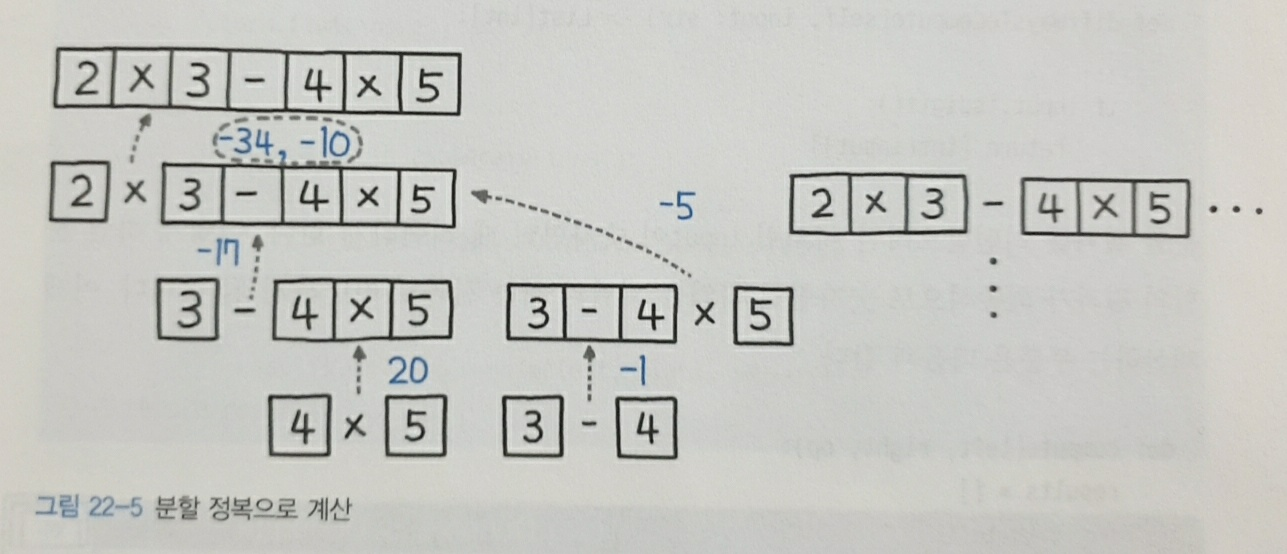

In [27]:
from IPython.display import Image

Image('그림22-5.jpg', width="600")

In [28]:
## *, -, + 연산자가 등장할 때 좌/우 분할을 하고 각각 계산 결과를 리턴한다.
## 이 그림을 보면 3-4*5는 -17과 -5의 복수 개의 계산 결과를 갖게 되며, 
## 최종적으로 2 * [-17, -5] 계산 결과인 [-34, -10]을 리턴하게 된다.
## 그림에는 생략했지만 우측으로는 각각 다른 계산 결과도 리턴받게 되며,
## 최종적으로 [-34, -14, -10, -10, 10] 이렇게 5개 결과를 리턴하게 된다.

In [29]:
class Solution:
    def diffWaysToCompute(self, _input: str) -> List[int]:
        def compute(left, right, op):
            results = []
            
            for l in left:
                for r in right:
                    results.append(eval(str(l) + op + str(r)))
            
            return results
        
        # 문자열이 숫자인지 아닌지 판별
        # 숫자로만 이루어진 문자열일 경우에만 True
        if _input.isdigit(): 
            return [int(_input)]
        
        results = []
        for index, value in enumerate(_input):
            if value in "-+*":
                left = self.diffWaysToCompute(_input[:index])
                right = self.diffWaysToCompute(_input[index + 1:])
                
                results.extend(compute(left, right, value))
        
        return results

In [30]:
## 연산자를 기준으로 재귀로 left, right를 계속 분할하고, 분할된 값은 compute() 함수로 계산한 결과를 extend()로 확장한다.
## 최종 분할 결과를 리턴받으려면 이처럼 _input이 숫자형일 때 리턴하게 된다.
## 이렇게 하면 분할의 결과가 최종적으로 숫자형인 타입을 재귀의 최종 결과로 리턴하게 될 것이다.

In [31]:
## 그림 22-5에서 마지막 계산 직전에 right는 [-17, -5]가 된다.
## 이처럼 복수형일 수 있기 때문에, 각각 반복으로 단수형 값을 추출해 계산한다.
## eval() 함수는 문자열을 파싱하고 파이썬 표현식으로 처리해주는 역할을 한다.

In [32]:
## **** 문법 **** 

    ## append() vs extend()
    
        ## 리스트에 또 다른 리스트를 삽입할 때 append()는 리스트 전체를 하나의 엘리먼트로 처리한다.
        ## 반면 extend()는 삽입 대상의 리스트를 풀어서 각각의 엘리먼트로 분리해 삽입한다.
        
        ## >>> a = [1, 2, 3]
        ## >>> b = [4, 5]
        ## >>> a.append(b)
        ## >>> a
        ## [1, 2, 3, [4, 5]]
        
        # >>> a = [1, 2, 3]
        ## >>> b = [4, 5]
        ## >>> a.extend(b)
        ## >>> a
        ## [1, 2, 3, 4, 5]